In [76]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [77]:
df = pd.read_csv("aug_train.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [78]:
train_target = pd.DataFrame(df['target'])
train_target

,target
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
19153,1.0
19154,1.0
19155,0.0
19156,0.0


## EDA

Text(0.5, 1.0, 'CDI vs Target')

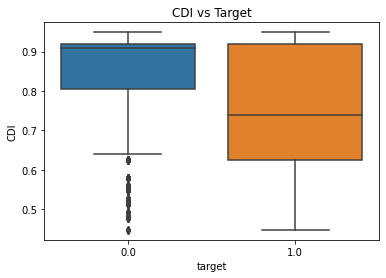

In [92]:
# CDI
sns.boxplot(x="target", y="city_development_index", data=df
                 )
plt.xlabel('target')
plt.ylabel('CDI')
plt.title('CDI vs Target')

Text(0.5, 1.0, 'Gender vs Target')

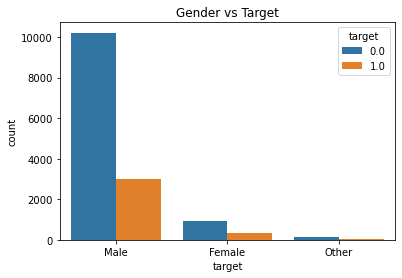

In [83]:
# gender
sns.countplot(df['gender'],hue=df['target'])
plt.xlabel('target')
plt.ylabel('count')
plt.title('Gender vs Target')

Text(0.5, 1.0, 'Relevent Experience vs Target')

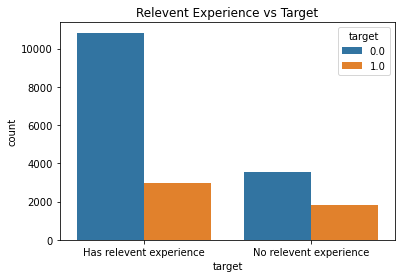

In [100]:
#relevant experience
sns.countplot(df['relevent_experience'],hue=df['target'])
plt.xlabel('target')
plt.ylabel('count')
plt.title('Relevent Experience vs Target')

Text(0.5, 1.0, 'Enrolled University vs Target')

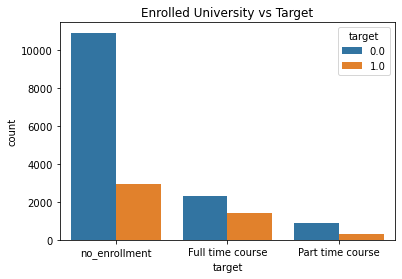

In [84]:
# enrolled_university
sns.countplot(df['enrolled_university'],hue=df['target'])
plt.xlabel('target')
plt.ylabel('count')
plt.title('Enrolled University vs Target')

Text(0.5, 1.0, 'experience vs Target')

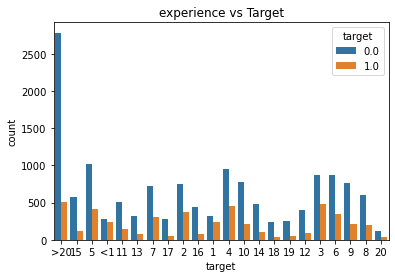

In [87]:
# experience
sns.countplot(df['experience'],hue=df['target'])
plt.xlabel('target')
plt.ylabel('count')
plt.title('experience vs Target')

Text(0.5, 1.0, 'company_size vs Target')

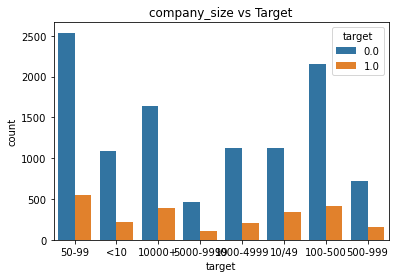

In [88]:
# company_size
sns.countplot(df['company_size'],hue=df['target'])
plt.xlabel('target')
plt.ylabel('count')
plt.title('company_size vs Target')

Text(0.5, 1.0, 'company_type vs Target')

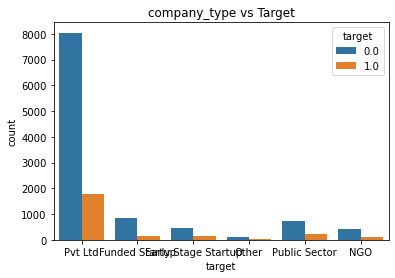

In [89]:
# company_type
sns.countplot(df['company_type'],hue=df['target'])
plt.xlabel('target')
plt.ylabel('count')
plt.title('company_type vs Target')

Text(0.5, 1.0, 'last_new_job vs Target')

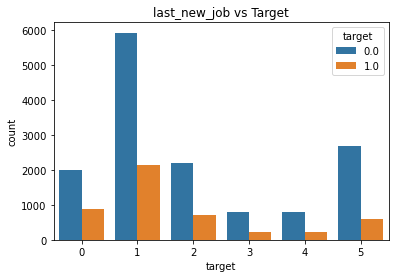

In [99]:

# last_new_job
sns.countplot(df['last_new_job'],hue=df['target'])
plt.xlabel('target')
plt.ylabel('count')
plt.title('last_new_job vs Target')

Text(0.5, 1.0, 'training_hours vs Target')

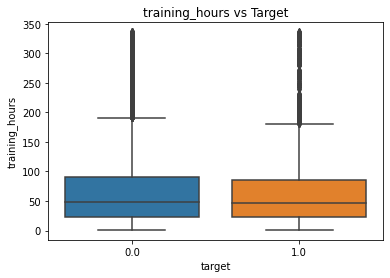

In [93]:
# training_hours
sns.boxplot(x="target", y="training_hours", data=df)
plt.xlabel('target')
plt.ylabel('training_hours')
plt.title('training_hours vs Target')

In [101]:
# EDA auto report
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature Engineering

In [96]:
# transform experience, last_new_job to numeric
df['experience'] = df['experience'].astype(str)
for i in range(df.shape[0]):
    df.loc[i,'experience'] = df.loc[i,'experience'].replace('>20','21').replace('<1','0').replace('nan','0')
df['experience'] = df['experience'].astype(int)

df['last_new_job'] = df['last_new_job'].astype(str)
for i in range(df.shape[0]):
    df.loc[i,'last_new_job'] = df.loc[i,'last_new_job'].replace('>4','5').replace('<','').replace('never','0').replace('nan','0')
df['last_new_job'] = df['last_new_job'].astype(int)
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0


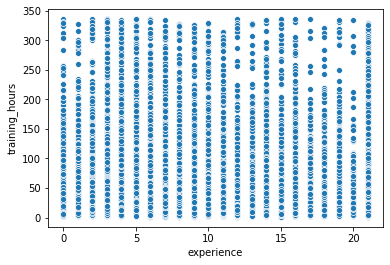

In [97]:
# a bit more EDA on training hours
sns.scatterplot(data=df, x="experience", y="training_hours")
plt.xlabel('experience')
plt.ylabel('training_hours')
plt.title('training_hours vs experience')

Text(0.5, 1.0, 'training_hours vs company_size')

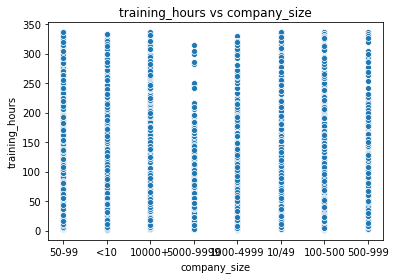

In [98]:
sns.scatterplot(data=df, x="company_size", y="training_hours")
plt.xlabel('company_size')
plt.ylabel('training_hours')
plt.title('training_hours vs company_size')

In [22]:
# impute missing values
# create a new category for unknown cells in categorical variables 

def impute_nan_create_category(DataFrame,ColName):
     DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"Unknown "+str(ColName),DataFrame[ColName])

for Columns in ['gender','enrolled_university','education_level','major_discipline','company_size','company_type']:
    impute_nan_create_category(df,Columns)

    
df.head(10)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Unknown company_size,Unknown company_type,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0.0
2,11561,city_21,0.624,Unknown gender,No relevent experience,Full time course,Graduate,STEM,5,Unknown company_size,Unknown company_type,0,83,0.0
3,33241,city_115,0.789,Unknown gender,No relevent experience,Unknown enrolled_university,Graduate,Business Degree,0,Unknown company_size,Pvt Ltd,0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,Unknown gender,Has relevent experience,Part time course,Graduate,STEM,11,Unknown company_size,Unknown company_type,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,Unknown major_discipline,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,5,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,Unknown gender,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,5,123,0.0


In [23]:
# feature prep
# transform categorical variables into dummies
gen = pd.get_dummies(df['gender'], drop_first = True)
rel_exp = pd.get_dummies(df['relevent_experience'], drop_first = True)
enrolled_uni = pd.get_dummies(df['enrolled_university'], drop_first = True)
ed_level = pd.get_dummies(df['education_level'], drop_first = True)
maj_dis = pd.get_dummies(df['major_discipline'], drop_first = True)
comp_size = pd.get_dummies(df['company_size'], drop_first = True)
comp_type = pd.get_dummies(df['company_type'], drop_first = True)



In [24]:
# concatenate together
df = pd.concat([df, gen, rel_exp, enrolled_uni, ed_level, maj_dis, comp_size, comp_type], axis = 1)
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,500-999,5000-9999,<10,Unknown company_size,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,Unknown company_type
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,Unknown company_size,...,0,0,0,1,0,0,0,0,0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,0,0,0,0,0,0,0,0,1,0
2,11561,city_21,0.624,Unknown gender,No relevent experience,Full time course,Graduate,STEM,5,Unknown company_size,...,0,0,0,1,0,0,0,0,0,1
3,33241,city_115,0.789,Unknown gender,No relevent experience,Unknown enrolled_university,Graduate,Business Degree,0,Unknown company_size,...,0,0,0,1,0,0,0,0,1,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,...,0,0,0,0,1,0,0,0,0,0


In [25]:
# drop enrollee_id, city, and those dummy origin that we don't want to study
df.drop(['enrollee_id', 'city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size','company_type'], axis = 1,inplace = True)
#test.drop(['enrollee_id', 'city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_size','company_type'], axis = 1,inplace = True)


In [26]:
df.head()

,city_development_index,experience,last_new_job,training_hours,target,Male,Other,Unknown gender,No relevent experience,Part time course,...,500-999,5000-9999,<10,Unknown company_size,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,Unknown company_type
0,0.920,21,1,36,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.776,15,5,47,0.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.624,5,0,83,0.0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0.789,0,0,52,1.0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0.767,21,4,8,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
X = df.drop(columns=['target'])
X

,city_development_index,experience,last_new_job,training_hours,Male,Other,Unknown gender,No relevent experience,Part time course,Unknown enrolled_university,...,500-999,5000-9999,<10,Unknown company_size,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,Unknown company_type
0,0.920,21,1,36,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0.776,15,5,47,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.624,5,0,83,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.789,0,0,52,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0.767,21,4,8,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,14,1,42,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
19154,0.920,14,4,52,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
19155,0.920,21,4,44,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19156,0.802,0,2,97,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


# Logistic Regression

In [28]:
# Normalize Numerical Columns
from sklearn.preprocessing import StandardScaler

df2 = df.loc[:, ['city_development_index', 'experience', 'last_new_job','training_hours']]
df2=pd.DataFrame(StandardScaler().fit_transform(df2))

df2.columns = ['city_development_index', 'experience', 'last_new_job','training_hours']                
df2

,city_development_index,experience,last_new_job,training_hours
0,0.738919,1.610142,-0.568247,-0.488985
1,-0.428410,0.726591,1.808713,-0.305825
2,-1.660590,-0.745992,-1.162487,0.293607
3,-0.323026,-1.482284,-1.162487,-0.222571
4,-0.501368,1.610142,1.214473,-0.955209
...,...,...,...,...
19153,0.398448,0.579333,-0.568247,-0.389079
19154,0.738919,0.579333,1.214473,-0.222571
19155,0.738919,1.610142,1.214473,-0.355778
19156,-0.217642,-1.482284,0.025993,0.526719


In [29]:
df3=df.copy()

df3['city_development_index'] = df2['city_development_index']
df3['experience'] = df2['experience']
df3['last_new_job'] = df2['last_new_job']
df3['training_hours'] = df2['training_hours']
df3

,city_development_index,experience,last_new_job,training_hours,target,Male,Other,Unknown gender,No relevent experience,Part time course,...,500-999,5000-9999,<10,Unknown company_size,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,Unknown company_type
0,0.738919,1.610142,-0.568247,-0.488985,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,-0.428410,0.726591,1.808713,-0.305825,0.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.660590,-0.745992,-1.162487,0.293607,0.0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
3,-0.323026,-1.482284,-1.162487,-0.222571,1.0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
4,-0.501368,1.610142,1.214473,-0.955209,0.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.398448,0.579333,-0.568247,-0.389079,1.0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
19154,0.738919,0.579333,1.214473,-0.222571,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
19155,0.738919,1.610142,1.214473,-0.355778,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19156,-0.217642,-1.482284,0.025993,0.526719,0.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


[[4071  257]
 [1052  368]]


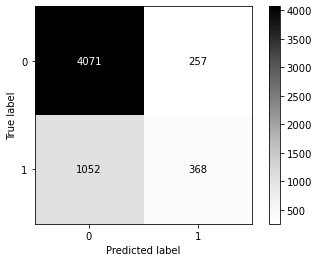

In [30]:
# Model Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


# Model Evaluation Tools
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=65)

#fitting linear regression
logreg = LogisticRegression(max_iter=1500)
logistic_model = logreg.fit(X_train, y_train)

#generating confusion matrix
Y_pred = logreg.predict(X_test)
confusionMatrix = confusion_matrix(y_test, Y_pred)
print(confusionMatrix)
diagram = metrics.ConfusionMatrixDisplay(confusionMatrix,display_labels=None)
diagram.plot(cmap = 'Greys')

## 4475 = True Positives
## 1160 = False Positive
## 284 = False Negative
## 404 = True Negative

In [31]:
log_metrics = pd.DataFrame(data=[metrics.accuracy_score(y_test,Y_pred),
                          metrics.precision_score(y_test, Y_pred),
                           metrics.recall_score(y_test, Y_pred),
                          metrics.r2_score(y_test, Y_pred),
                          metrics.roc_auc_score(y_test, Y_pred)])


print ('Accuracy :', round(metrics.accuracy_score(y_test,Y_pred),6) )
print ('Precision :', round(metrics.precision_score(y_test, Y_pred),6) )
print ('Recall :', round(metrics.precision_score(y_test, Y_pred),6) )
print ('Roc AUC :', round(metrics.roc_auc_score(y_test, Y_pred),6) )

Accuracy : 0.772269
Precision : 0.5888
Recall : 0.5888
Roc AUC : 0.599887


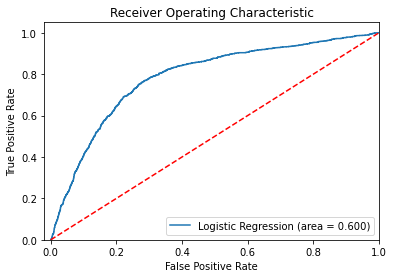

In [32]:
# Displaying the ROC-AUC - Logistic Regression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Logistic_ROC')
plt.show()


In [33]:
#count number in each class
from collections import Counter
X = df.drop(columns=['target'])
y = df['target']
counter = Counter(y)
print(counter)

Counter({0.0: 14381, 1.0: 4777})


In [34]:
#apply SMOTE - balance the classes
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X2 = X.to_numpy()  # pass X as numpy arrays
X_smote, y_smote = oversample.fit_resample(X2, y)
counter = Counter(y_smote)
print(counter)

Counter({1.0: 14381, 0.0: 14381})


In [35]:
X_smote_df = pd.DataFrame(X_smote)
X_smote_df.columns = X.columns
X_smote_df

,city_development_index,experience,last_new_job,training_hours,Male,Other,Unknown gender,No relevent experience,Part time course,Unknown enrolled_university,...,500-999,5000-9999,<10,Unknown company_size,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,Unknown company_type
0,0.920000,21.000000,1.000000,36.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000
1,0.776000,15.000000,5.000000,47.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.000000
2,0.624000,5.000000,0.000000,83.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.0,...,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000
3,0.789000,0.000000,0.000000,52.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.0,...,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.000000
4,0.767000,21.000000,4.000000,8.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28757,0.920000,17.000000,3.000000,11.580894,1.000000,0.0,0.000000,0.580894,0.000000,0.0,...,0.580894,0.0,0.000000,0.419106,0.0,0.0,0.0,0.0,0.580894,0.419106
28758,0.710081,0.117986,1.000000,20.882014,0.882014,0.0,0.117986,1.000000,0.000000,0.0,...,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000
28759,0.532302,19.977438,1.000000,64.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.022562,0.0,0.0,0.0,0.0,0.000000,1.000000
28760,0.862194,21.000000,1.802857,8.197143,1.000000,0.0,0.000000,0.000000,0.802857,0.0,...,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000


[[3170 1164]
 [ 956 3339]]


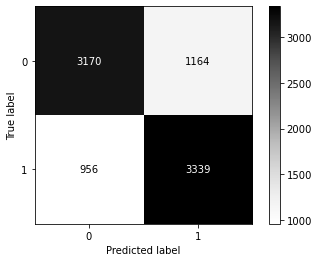

In [36]:
# Running logistic regression again with balanced classes

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=65)

#fitting linear regression
logreg = LogisticRegression(max_iter=1500)
logistic_model = logreg.fit(X_train, y_train)

#generating confusion matrix
Y_pred = logreg.predict(X_test)
confusionMatrix = confusion_matrix(y_test, Y_pred)
print(confusionMatrix)
diagram = metrics.ConfusionMatrixDisplay(confusionMatrix,display_labels=None)
diagram.plot(cmap = 'Greys')

## 3169 = True Positives
## 1165 = False Positive
## 1027 = False Negative
## 3268 = True Negative

In [37]:
log_metrics = pd.DataFrame(data=[metrics.accuracy_score(y_test,Y_pred),
                          metrics.precision_score(y_test, Y_pred),
                           metrics.recall_score(y_test, Y_pred),
                          metrics.r2_score(y_test, Y_pred),
                          metrics.roc_auc_score(y_test, Y_pred)])


print ('Accuracy :', round(metrics.accuracy_score(y_test,Y_pred),6) )
print ('Precision :', round(metrics.precision_score(y_test, Y_pred),6) )
print ('Recall :', round(metrics.precision_score(y_test, Y_pred),6) )
print ('Roc AUC :', round(metrics.roc_auc_score(y_test, Y_pred),6) )
print("")
print('Accuracy of the model decreased slightly, but precision, recall, and roc auc all improved after the classes were balanced.')

Accuracy : 0.754317
Precision : 0.741506
Recall : 0.741506
Roc AUC : 0.754421

Accuracy of the model decreased slightly, but precision, recall, and roc auc all improved after the classes were balanced.


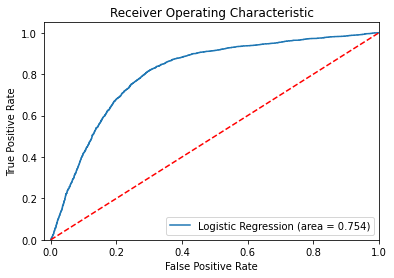

In [38]:
# Displaying the ROC-AUC - Logistic Regression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Logistic_ROC')
plt.show()


Feature: 0, Score: -6.56455
Feature: 1, Score: -0.02558
Feature: 2, Score: 0.08662
Feature: 3, Score: -0.00074
Feature: 4, Score: -0.14224
Feature: 5, Score: 0.07169
Feature: 6, Score: -0.11751
Feature: 7, Score: 0.09212
Feature: 8, Score: -0.33815
Feature: 9, Score: -0.37694
Feature: 10, Score: -0.18350
Feature: 11, Score: -0.79228
Feature: 12, Score: -0.33108
Feature: 13, Score: -0.45184
Feature: 14, Score: -1.48222
Feature: 15, Score: -0.81777
Feature: 16, Score: 0.01191
Feature: 17, Score: -0.16036
Feature: 18, Score: -0.31317
Feature: 19, Score: -0.30939
Feature: 20, Score: -0.03500
Feature: 21, Score: -0.64620
Feature: 22, Score: -0.47029
Feature: 23, Score: -0.43014
Feature: 24, Score: -0.15880
Feature: 25, Score: -0.44997
Feature: 26, Score: -0.42141
Feature: 27, Score: -0.22117
Feature: 28, Score: -0.56538
Feature: 29, Score: 0.90493
Feature: 30, Score: -0.29188
Feature: 31, Score: -0.05393
Feature: 32, Score: 0.50692
Feature: 33, Score: 0.27200
Feature: 34, Score: -0.07061
Fe

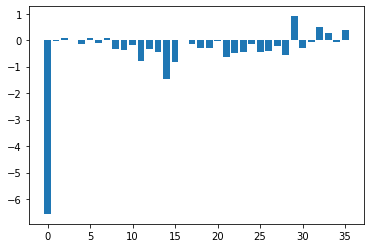

In [111]:
# get importance
importance = logistic_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Random Forest with Balanced Classes

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [113]:
## Random forest is not sensitive to the magnitude of variables. 
## So standardization is not needed before fitting this model.


In [114]:
X_train.shape

(20133, 36)

In [115]:
y_pred_rf = rf.predict(X_test)
print("The Confusion Matrix for Random Forest is: \n{}\n".format(confusion_matrix(y_test, y_pred_rf)))

log_metrics = pd.DataFrame(data=[metrics.accuracy_score(y_test,y_pred_rf),
                          metrics.precision_score(y_test, y_pred_rf),
                           metrics.recall_score(y_test, y_pred_rf),
                          metrics.r2_score(y_test, y_pred_rf),
                          metrics.roc_auc_score(y_test, y_pred_rf)])


print ('Accuracy :', round(metrics.accuracy_score(y_test,y_pred_rf),6) )
print ('Precision :', round(metrics.precision_score(y_test, y_pred_rf),6) )
print ('Recall :', round(metrics.precision_score(y_test, y_pred_rf),6) )
print ('Roc AUC :', round(metrics.roc_auc_score(y_test, y_pred_rf),6) )

The Confusion Matrix for Random Forest is: 
[[3823  511]
 [ 713 3582]]

Accuracy : 0.858153
Precision : 0.875153
Recall : 0.875153
Roc AUC : 0.858044


[[3823  511]
 [ 713 3582]]


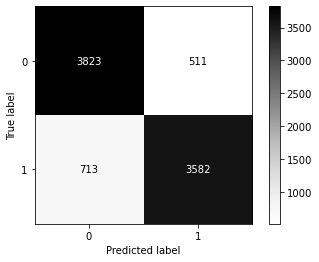

In [118]:
#generating confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred_rf)
print(confusionMatrix)
diagram = metrics.ConfusionMatrixDisplay(confusionMatrix,display_labels=None)
diagram.plot(cmap = 'Greys')


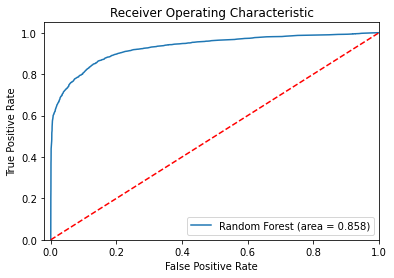

In [116]:
# Displaying the ROC-AUC - Logistic Regression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()


Feature: 0, Score: 0.18629
Feature: 1, Score: 0.10705
Feature: 2, Score: 0.06225
Feature: 3, Score: 0.14784
Feature: 4, Score: 0.02709
Feature: 5, Score: 0.00247
Feature: 6, Score: 0.02054
Feature: 7, Score: 0.03346
Feature: 8, Score: 0.01028
Feature: 9, Score: 0.00419
Feature: 10, Score: 0.03901
Feature: 11, Score: 0.01004
Feature: 12, Score: 0.03592
Feature: 13, Score: 0.00453
Feature: 14, Score: 0.00285
Feature: 15, Score: 0.00340
Feature: 16, Score: 0.00265
Feature: 17, Score: 0.00389
Feature: 18, Score: 0.00163
Feature: 19, Score: 0.00283
Feature: 20, Score: 0.02745
Feature: 21, Score: 0.01639
Feature: 22, Score: 0.01931
Feature: 23, Score: 0.01055
Feature: 24, Score: 0.01590
Feature: 25, Score: 0.02206
Feature: 26, Score: 0.00651
Feature: 27, Score: 0.00485
Feature: 28, Score: 0.00840
Feature: 29, Score: 0.05575
Feature: 30, Score: 0.00638
Feature: 31, Score: 0.00329
Feature: 32, Score: 0.00129
Feature: 33, Score: 0.00638
Feature: 34, Score: 0.04070
Feature: 35, Score: 0.04657


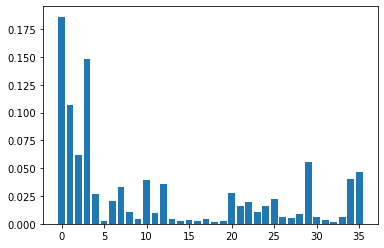

In [117]:
from matplotlib import pyplot

importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()